In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

train_targets = pd.read_parquet('/Users/petterdalhaug/Documents/GitHub/data_analysis/analysis/data/B/train_targets.parquet')
X_train_observed = pd.read_parquet('/Users/petterdalhaug/Documents/GitHub/data_analysis/analysis/data/B/X_train_observed.parquet')
X_train_estimated = pd.read_parquet('/Users/petterdalhaug/Documents/GitHub/data_analysis/analysis/data/B/X_train_estimated.parquet')


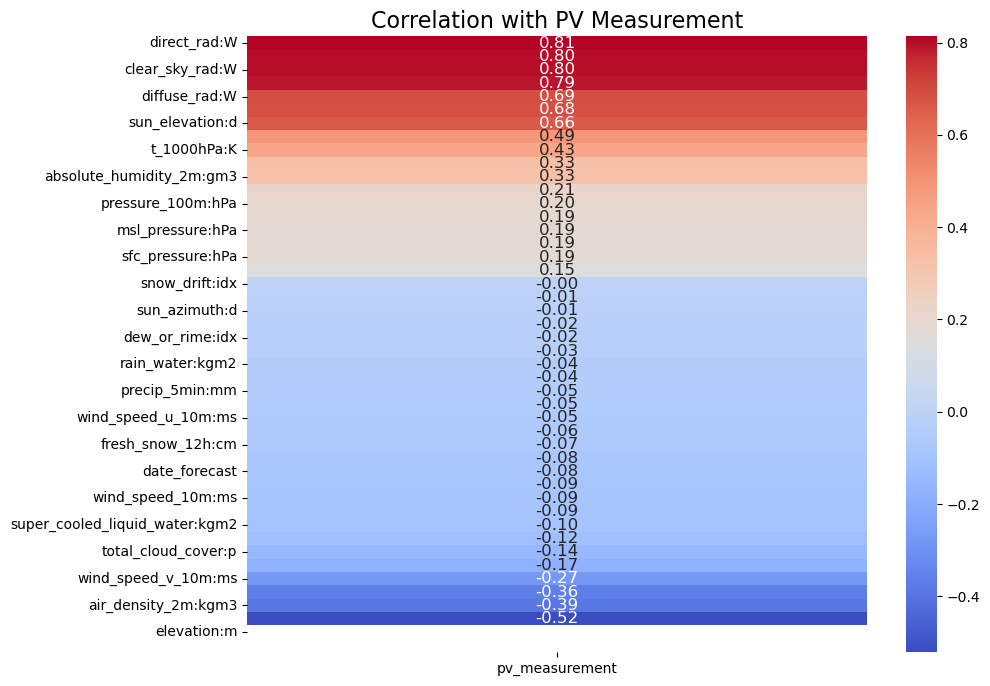

In [8]:
# Rename Columns
train_targets.rename(columns={'time': 'date_forecast'}, inplace=True)

# Align Time Intervals
X_train_observed_1hr = X_train_observed.groupby(pd.Grouper(key='date_forecast', freq='1H')).mean()

# Merge DataFrames
real_data = pd.merge(train_targets, X_train_observed_1hr.reset_index(), on='date_forecast')

# To fill NaN values with the mean
# Exclude constant features from the data before calculating correlation
filtered_real_data = real_data.drop(columns=[])

# Recalculate the correlation matrix
real_corr = filtered_real_data.corr()

# Filter to only include correlation with 'pv_measurement' and sort it
real_corr_with_target = real_corr[['pv_measurement']].sort_values(by='pv_measurement', ascending=False)

# Remove the 'pv_measurement' row to exclude the correlation of the target with itself
real_corr_with_target = real_corr_with_target.drop(index='pv_measurement')
# print(real_corr_with_target)
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(real_corr_with_target, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 12})
plt.title("Correlation with PV Measurement", fontsize=16)
plt.show()

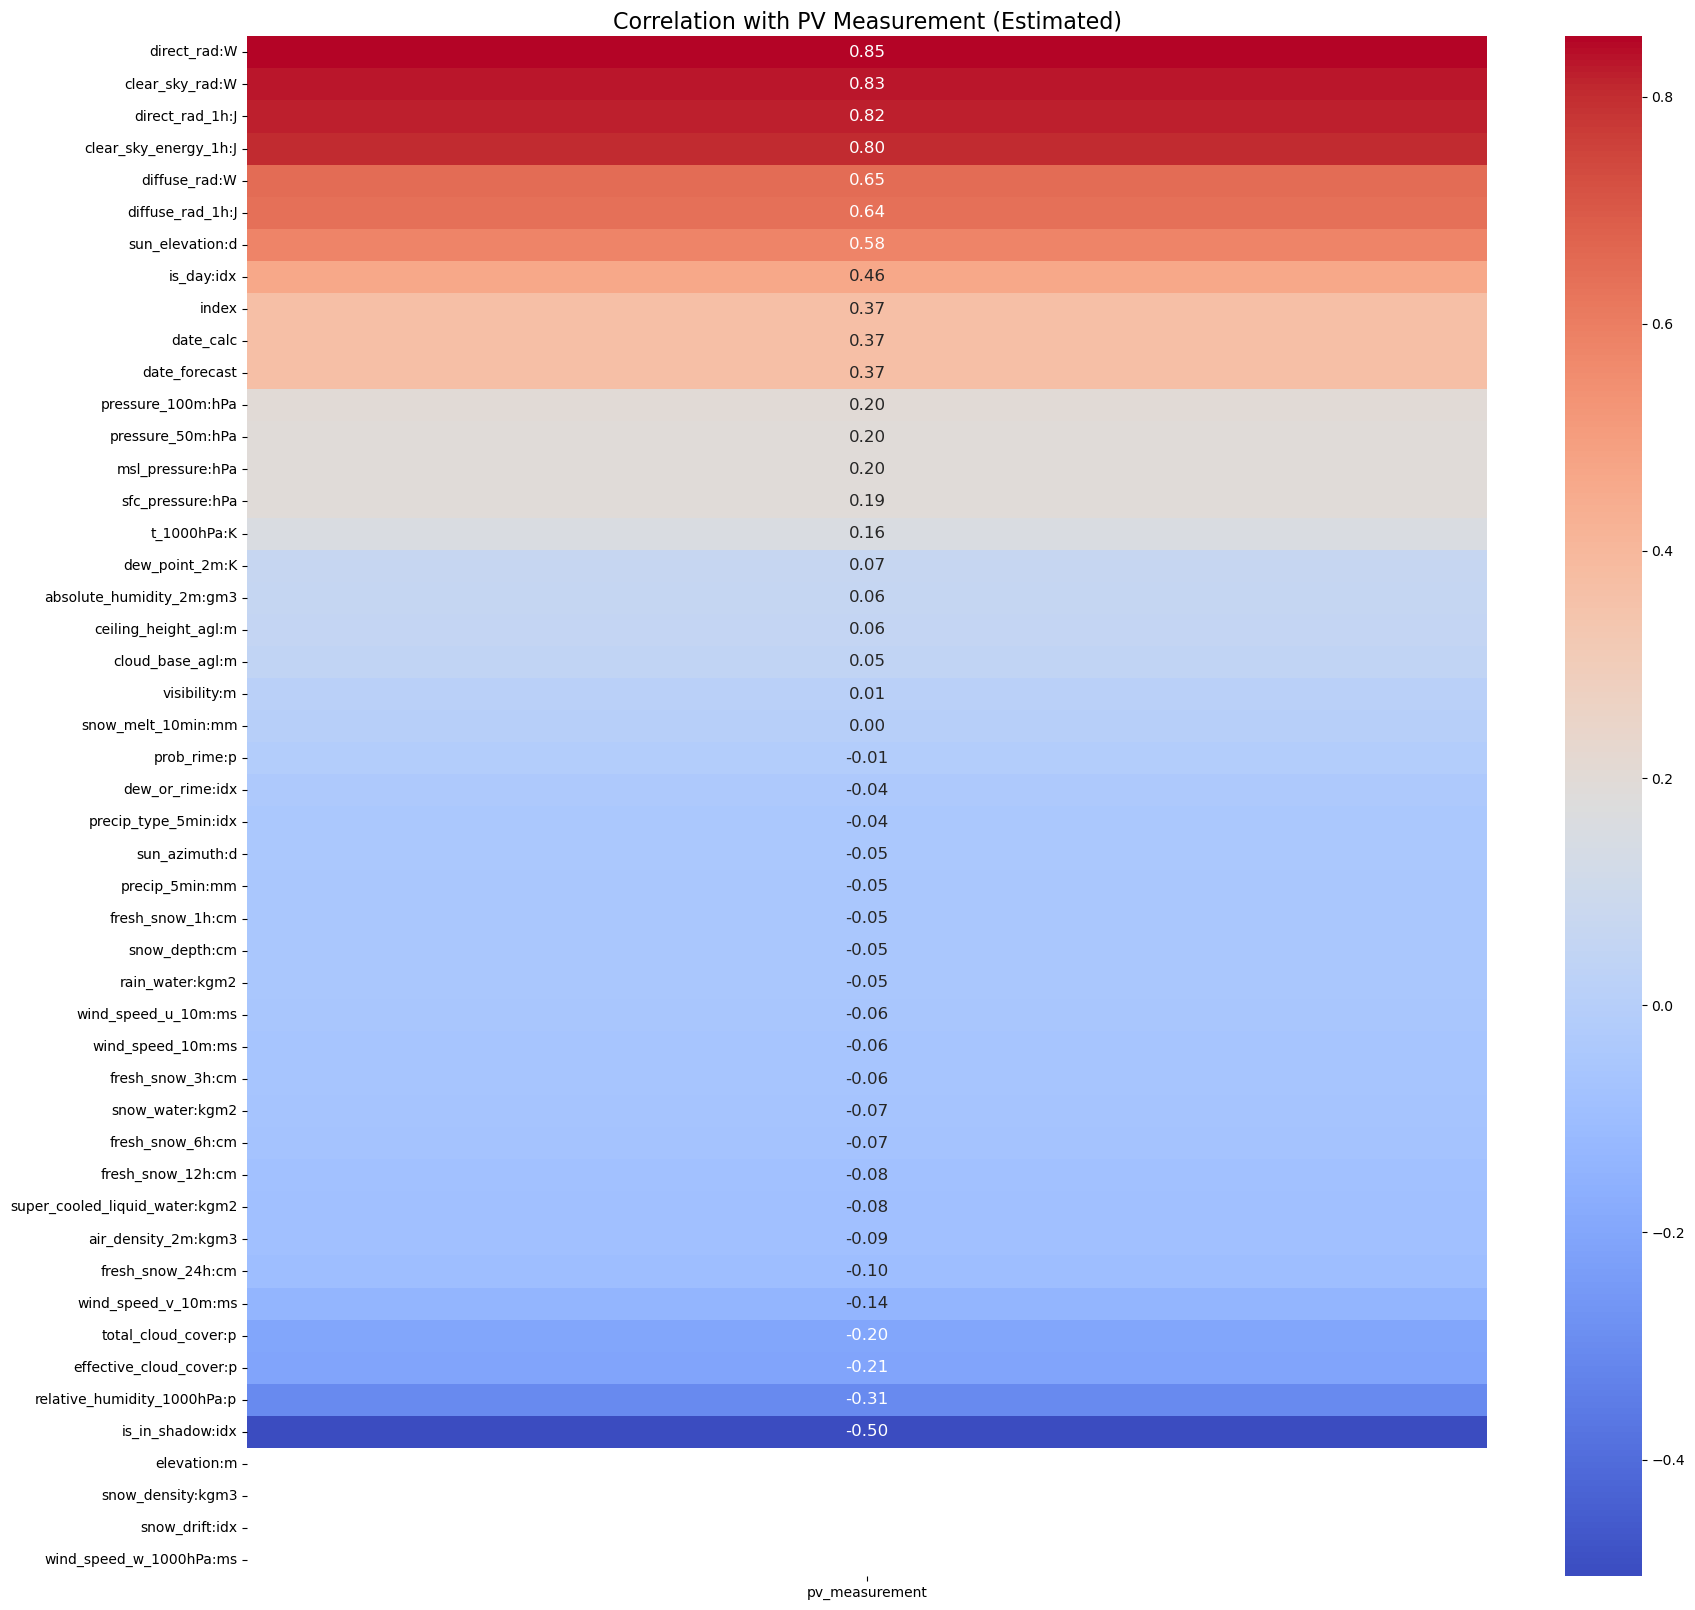

In [9]:
# If x_train_estimated has a 'date_forecast' field and needs to be grouped
# X_train_estimated_1hr = x_train_estimated.groupby(pd.Grouper(key='date_forecast', freq='1H')).mean()

# Merge DataFrames
estimated_data = pd.merge(train_targets, X_train_estimated.reset_index(), on='date_forecast')  # Make sure to reset the index

estimated_data.drop(columns=[], inplace=True)
# Calculate Correlation
estimated_corr = estimated_data.corr()

# Filter to only include correlation with 'pv_measurement'
estimated_corr_with_target = estimated_corr[['pv_measurement']].sort_values(by='pv_measurement', ascending=False)
estimated_corr_with_target = estimated_corr_with_target.drop(index='pv_measurement')

# print(estimated_corr_with_target)


# Plot Heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(estimated_corr_with_target, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 12})
plt.title("Correlation with PV Measurement (Estimated)", fontsize=16)
plt.show()